<a href="https://colab.research.google.com/github/andresRah/NLP_KeepCoding/blob/main/1)_An%C3%A1lisis_Exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Práctica NLP
**Punto #1**

Descarga y exploración del corpus

El alumno descargará el/los corpus que desee (detalle sobre los datos a utilizar en
el siguiente punto) y realizará un análisis exploratorio de los datos.


El dataset seleccionado para el desarrollo de la práctica es **reviews_Pet_Supplies_5.json** y se encuentra en la raiz del notebook, se descargo del siguiente sitio web -> https://jmcauley.ucsd.edu/data/amazon/

In [1]:
# Importar Librerias Necesarias para la Exploración
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import ngrams
from gensim.models import Word2Vec
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize

In [6]:
# Lectura del dataset

path_file = 'reviews_Pet_Supplies_5.json.gz'

df_pets = pd.read_json(path_file, lines=True, compression='gzip')

In [7]:
# Seleccionar las primeras 7000 filas - Hacemos esto para reducir la carga en procesamiento
data_subset = df_pets.head(7000)

In [8]:
# Seleccionamos las feature objetivo
data_subset = data_subset[['reviewText', 'overall']]

In [9]:
# Categorizar 'trend' en negativa (0) o positiva (1)
data_subset['trend'] = data_subset['overall'].apply(lambda x: 1 if x > 3 else 0)

In [10]:
# Pre-Visualización del dataset
data_subset.head(10)

,reviewText,overall,trend
0,I purchased the Trilogy with hoping my two cat...,3,0
1,There are usually one or more of my cats watch...,5,1
2,I bought the triliogy and have tested out all ...,4,1
3,My female kitty could care less about these vi...,4,1
4,"If I had gotten just volume two, I would have ...",3,0
5,"My Rottie has food allergies to poultry, beef ...",5,1
6,My puppy loves this stuff! His tail starts wag...,5,1
7,My toy poodle loves this stuff and will let me...,4,1
8,Works great and dog doesn't hate the taste. G...,5,1
9,"Yes , my Princess is enjoying the taste showin...",5,1


### 1.1 Cardinalidad del vocabulario

In [11]:
reviews = data_subset['reviewText']

# Convertir a minúsculas y eliminar espacios
splitted_reviews = reviews.str.lower().str.split()
words = splitted_reviews.apply(pd.Series).stack().reset_index(drop=True)

# Calcular la cardinalidad del vocabulario
vocab_size = len(set(words))

print(f'Cardinalidad del vocabulario: {vocab_size} Tokens')

Cardinalidad del vocabulario: 34663 Tokens


In [12]:
words.head(20)

0               i
1       purchased
2             the
3         trilogy
4            with
5          hoping
6              my
7             two
8           cats,
9             age
10              3
11            and
12              5
13          would
14             be
15    interested.
16            the
17              3
18             yr
19            old
dtype: object

A simple vista se observan muchos stopwords en el vocabulario, vamos a intentar identificar los más comunes

In [13]:
from collections import Counter

words = Counter(words)
most_common_words = words.most_common(10)

print("Palabras más frecuentes:")
for word, count in most_common_words:
    print(f"{word}: {count}")

Palabras más frecuentes:
the: 25022
and: 15641
i: 15534
to: 14649
a: 13854
it: 11583
this: 8329
of: 8130
is: 7811
for: 7495


Efectivamente corresponde a preposiciones

### 1.2 Distribución de reviews por número de estrellas

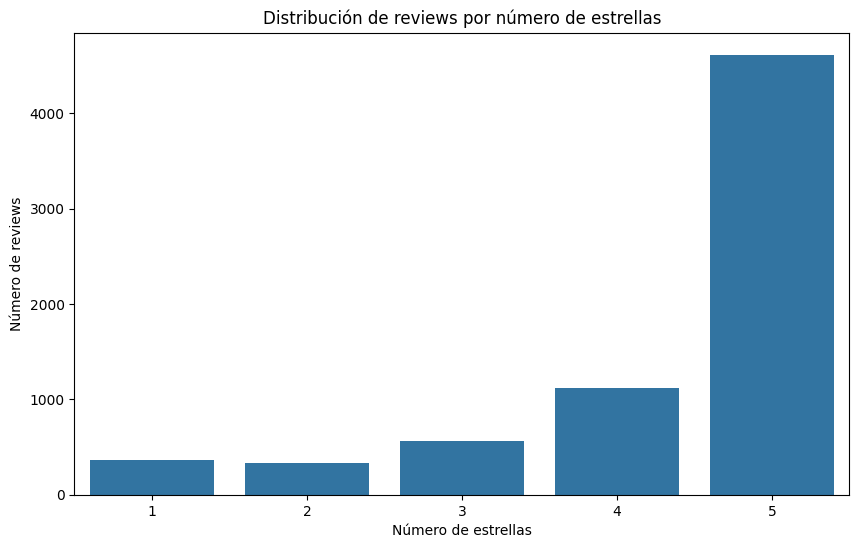

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(data_subset['overall'].value_counts())
plt.xlabel('Número de estrellas')
plt.ylabel('Número de reviews')
plt.title('Distribución de reviews por número de estrellas')
plt.show()

La mayoria de reviews son positivas

### 1.3 No de reviews positivas y negativas

In [15]:
sentiment_counts = data_subset['trend'].value_counts()
print(f'Número de reviews positivas: {sentiment_counts[1]}')
print(f'Número de reviews negativas: {sentiment_counts[0]}')

Número de reviews positivas: 5739
Número de reviews negativas: 1261


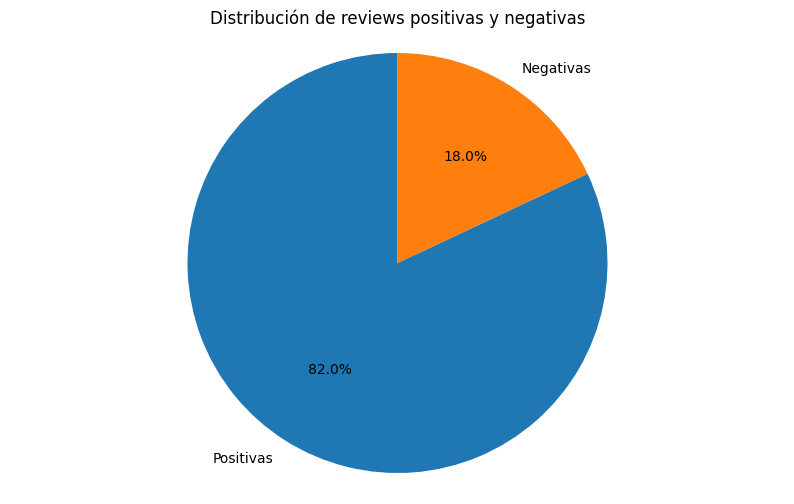

In [16]:
plt.figure(figsize=(10, 6))
plt.pie(sentiment_counts, labels=['Positivas', 'Negativas'], autopct='%1.1f%%', startangle=90)
plt.title('Distribución de reviews positivas y negativas')
plt.axis('equal')
plt.show()

Tenemos más reviews positivas que negativas como se evidencia en la gráfica previa

### 1.4 N-grams más frecuentes

In [17]:
# Bigrams
bigrams = ngrams(words, 2)
bigrams_df = pd.Series(bigrams).value_counts().head(20)
print(f'Bigrams más frecuentes:\n{bigrams_df}')

Bigrams más frecuentes:
(i, purchased)           1
((let, for),)            1
((150, gph))             1
(ac30, (150)             1
(tanks", ac30)           1
((your, tanks")          1
("up, (your)             1
(conclusion,, "up)       1
(gph., conclusion,)      1
(ac50., gph.)            1
(aqeon, ac50.)           1
(232,, aqeon)            1
(400,, 232,)             1
(for), 400,)             1
(math., for))            1
(for),, math.)           1
("oversize", (let)       1
(shrimps, impedes)       1
(agiasnt, "oversize")    1
(nifty, agiasnt)         1
Name: count, dtype: int64


In [18]:
# Bigrams
trigrams = ngrams(words, 3)
trigrams_df = pd.Series(trigrams).value_counts().head(20)
print(f'Tigrams más frecuentes:\n{trigrams_df}')

Tigrams más frecuentes:
(i, purchased, the)             1
((let, for),, math.)            1
((150, gph), shrimps)           1
(ac30, (150, gph))              1
(tanks", ac30, (150)            1
((your, tanks", ac30)           1
("up, (your, tanks")            1
(conclusion,, "up, (your)       1
(gph., conclusion,, "up)        1
(ac50., gph., conclusion,)      1
(aqeon, ac50., gph.)            1
(232,, aqeon, ac50.)            1
(400,, 232,, aqeon)             1
(for), 400,, 232,)              1
(math., for), 400,)             1
(for),, math., for))            1
("oversize", (let, for),)       1
(shrimps, impedes, gunk.)       1
(agiasnt, "oversize", (let)     1
(nifty, agiasnt, "oversize")    1
Name: count, dtype: int64


### 1.5. Nubes de palabras

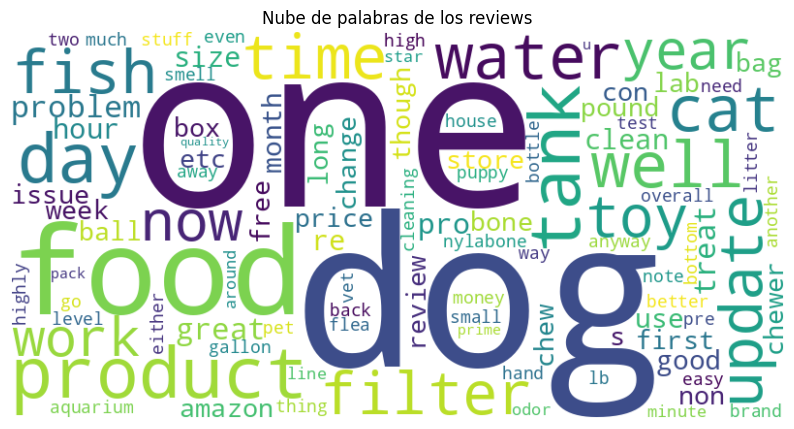

In [19]:
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(' '.join(words))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras de los reviews')
plt.show()

Se identifican palabras frecuentes poco esperadas como, time, fish, one

### 1.6. Visualización en 2 dimensiones de algunos word embeddings calculados con Word2Vec (elegir 4-5 palabras y pintar las top 10 más similares)

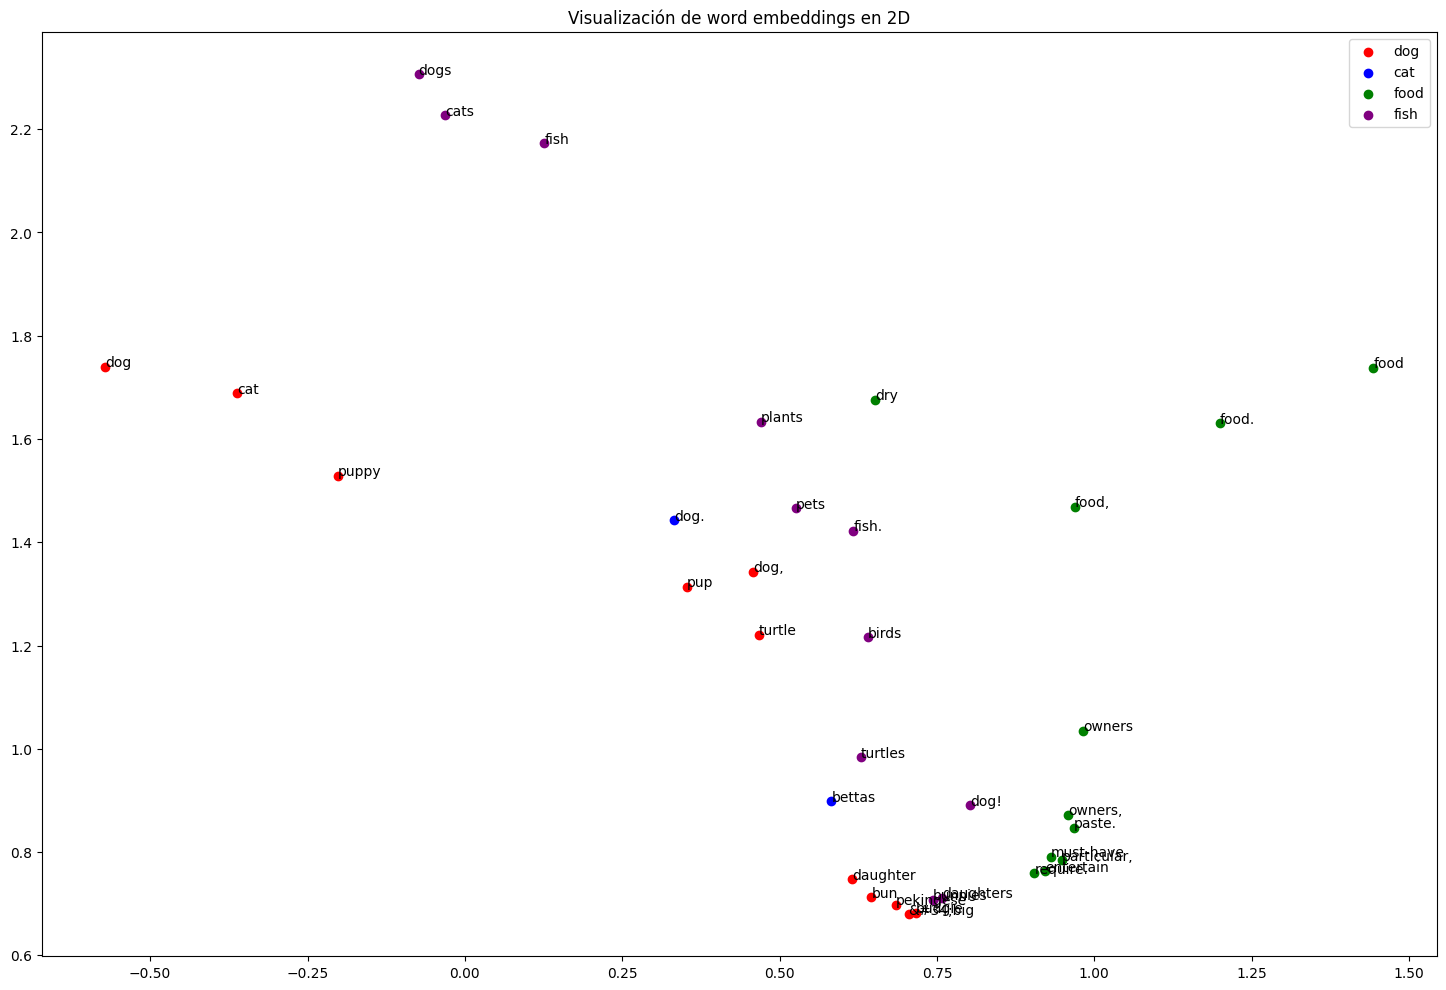

In [20]:
from sklearn.manifold import TSNE

corpus = splitted_reviews

# Modelo Word2Vec
model = Word2Vec(corpus, vector_size=100, window=5, min_count=2, workers=4)

words_to_visualize = ['dog', 'cat', 'food', 'fish']
similar_words = {word: [similar_word for similar_word, _ in model.wv.most_similar(word, topn=10)] for word in words_to_visualize}

all_words = list(set([word for sublist in similar_words.values() for word in sublist] + words_to_visualize))
word_vectors = np.array([model.wv[word] for word in all_words])

tsne = TSNE(n_components=2, init='pca', random_state=32)

word_tsne = tsne.fit_transform(word_vectors)

# Asignación de colores a los grupos de palabras
color_map = {
    'dog': 'red',
    'cat': 'blue',
    'food': 'green',
    'fish': 'purple'
}
colors = []
labels = []
for word in all_words:
    for key, color in color_map.items():
        if word in similar_words[key] or word == key:
            colors.append(color)
            labels.append(key)
            break

# Visualización de los embeddings con leyenda y ajuste de etiquetas
plt.figure(figsize=(18, 12))
unique_labels = list(color_map.keys())
texts = []
for label in unique_labels:
    indices = [i for i, l in enumerate(labels) if l == label]
    plt.scatter(word_tsne[indices, 0], word_tsne[indices, 1], c=color_map[label], label=label)
    for i in indices:
        texts.append(plt.text(word_tsne[i, 0], word_tsne[i, 1], all_words[i]))

plt.title('Visualización de word embeddings en 2D')
plt.legend()
plt.show()


### Conclusiones

1. Se puede identificar que existen algunas "palabras outliers", algunas palabras están más alejadas del resto, lo que puede indicar que tienen un contexto de uso más específico o menos relacionado con las demás palabras. Por ejemplo, park, dry, plants.

2. La nube de palabras muestra visualmente los términos más recurrentes en esta caso como son reviews de cosas para mascotas, es normal encontrar palabras como food, dog, cat, fish.

3. La visualización de word embeddings muestra las relaciones semánticas entre palabras clave y sus términos más similares, ayudando a entender mejor el contexto en el que se usan estas palabras.

4. La mayoría de las reviews tienen una calificación alta (4 o 5 estrellas), lo que sugiere una tendencia positiva general en las opiniones. Entiendo que esto puede incluir cierto sesgo en el modelo, pero continuaré con el dataset como esta.

In [21]:
# Guardamos el dataframe para el (Paso 2 - Preprocesado)
data_subset.to_csv('corpus_one.csv', index=False)